In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

1. Linear Regression using Analytic Solution

In [10]:
# Adding bias term (column of 1s) to the input matrix X
X = np.vstack([np.ones(len(x)), x]).T

# Compute regression coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"Coefficients (analytic solution): {coefficients}")

# Predicting y values using the regression model
y_pred_analytic = X @ coefficients

Coefficients (analytic solution): [1.23636364 1.16969697]


Sum of Squared Errors (SSE) using analytic solution: 5.624242424242421
R² value using analytic solution: 0.952538038613988


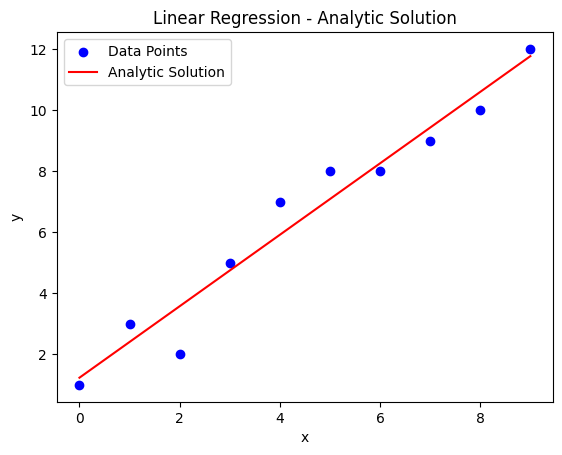

In [11]:
# Calculate Sum of Squared Errors (SSE)
SSE_analytic = np.sum((y - y_pred_analytic) ** 2)
print(f"Sum of Squared Errors (SSE) using analytic solution: {SSE_analytic}")

# Calculate R² value
SS_tot = np.sum((y - np.mean(y)) ** 2)
R2_analytic = 1 - (SSE_analytic / SS_tot)
print(f"R² value using analytic solution: {R2_analytic}")

# Plotting the results
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_analytic, color='red', label='Analytic Solution')
plt.title('Linear Regression - Analytic Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

 2. Linear Regression using Gradient Descent

In [12]:
def compute_cost(X, y, theta):
    """Compute cost for linear regression."""
    predictions = X @ theta
    errors = predictions - y
    cost = (1 / (2 * len(y))) * np.sum(errors ** 2)
    return cost


In [13]:
def gradient_descent(X, y, theta, learning_rate, num_iterations, stop_criteria=1e-6):
    """Perform gradient descent to learn theta."""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = X @ theta
        errors = predictions - y
        theta -= (learning_rate / m) * (X.T @ errors)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Stop if the cost is not decreasing significantly
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < stop_criteria:
            print(f"Stopping early at iteration {i} due to small change in cost.")
            break

    return theta, cost_history

Coefficients (Full-batch Gradient Descent): [1.17580361 1.17935476]
SSE (Full-batch Gradient Descent): 5.634861529064237
R² value (Full-batch Gradient Descent): 0.9524484259150697


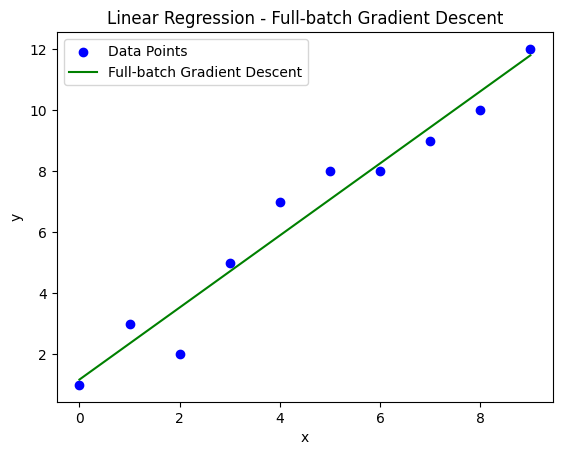

In [14]:
# Initial parameters
theta_initial = np.zeros(2)
learning_rate = 0.01
num_iterations = 1000

# Running full-batch gradient descent
theta_full_batch, cost_history_full_batch = gradient_descent(X, y, theta_initial, learning_rate, num_iterations)
print(f"Coefficients (Full-batch Gradient Descent): {theta_full_batch}")

# Predicting y values using full-batch gradient descent model
y_pred_full_batch = X @ theta_full_batch

# Calculate SSE and R² value for full-batch gradient descent
SSE_full_batch = np.sum((y - y_pred_full_batch) ** 2)
R2_full_batch = 1 - (SSE_full_batch / SS_tot)
print(f"SSE (Full-batch Gradient Descent): {SSE_full_batch}")
print(f"R² value (Full-batch Gradient Descent): {R2_full_batch}")

# Plotting the results
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_full_batch, color='green', label='Full-batch Gradient Descent')
plt.title('Linear Regression - Full-batch Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3. Stochastic Gradient Descent
  3.1 Perform stochastic gradient descent to learn theta.

In [15]:
def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations, stop_criteria=1e-6):
    """Perform stochastic gradient descent to learn theta."""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        cost_epoch = []

        for j in range(m):
            X_j = X[j, :].reshape(1, -1)
            y_j = np.array([y[j]])  # Ensure y_j is an array
            prediction = X_j @ theta
            error = prediction - y_j
            theta -= learning_rate * (X_j.T @ error)
            cost_epoch.append(compute_cost(X_j, y_j, theta))  # Calculate cost for single data point

        cost_history.append(np.mean(cost_epoch))

        # Stop if the cost is not decreasing significantly
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < stop_criteria:
            print(f"Stopping early at iteration {i} due to small change in cost.")
            break

    return theta, cost_history


In [16]:
# Running stochastic gradient descent
theta_stochastic, cost_history_stochastic = stochastic_gradient_descent(X, y, theta_initial, learning_rate, num_iterations)
print(f"Coefficients (Stochastic Gradient Descent): {theta_stochastic}")

# Predicting y values using stochastic gradient descent model
y_pred_stochastic = X @ theta_stochastic

# Calculate SSE and R² value for stochastic gradient descent
SSE_stochastic = np.sum((y - y_pred_stochastic) ** 2)
R2_stochastic = 1 - (SSE_stochastic / SS_tot)
print(f"SSE (Stochastic Gradient Descent): {SSE_stochastic}")
print(f"R² value (Stochastic Gradient Descent): {R2_stochastic}")

Stopping early at iteration 64 due to small change in cost.
Coefficients (Stochastic Gradient Descent): [1.14879128 1.19181997]
SSE (Stochastic Gradient Descent): 5.666055654798557
R² value (Stochastic Gradient Descent): 0.9521851843476915


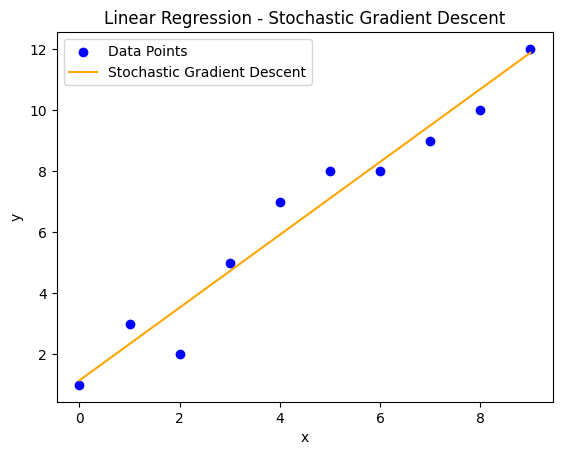

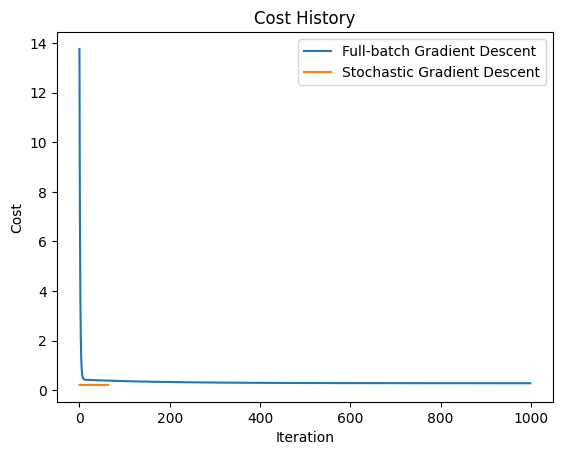

In [17]:
# Plotting the results
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_stochastic, color='orange', label='Stochastic Gradient Descent')
plt.title('Linear Regression - Stochastic Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plotting cost history for both methods
plt.plot(cost_history_full_batch, label='Full-batch Gradient Descent')
plt.plot(cost_history_stochastic, label='Stochastic Gradient Descent')
plt.title('Cost History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()